In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('bestseller.csv')

In [35]:
df = df.drop('book_uri', axis=1)

In [39]:
df = df.iloc[: , 1:]

In [40]:
df

,rank,rank_last_week,weeks_on_list,primary_isbn13,publisher,description,title,author
0,1,1,4,9781668001226,Atria,"In the sequel to “It Ends With Us,” Lily deals...",IT STARTS WITH US,Colleen Hoover
1,2,2,80,9781501110368,Atria,A battered wife raised in a violent home attem...,IT ENDS WITH US,Colleen Hoover
2,3,3,66,9781538724736,Grand Central,Lowen Ashleigh is hired by the husband of an i...,VERITY,Colleen Hoover
3,4,4,68,9781476753188,Atria,A casual sexual relationship between Tate and ...,UGLY LOVE,Colleen Hoover
4,5,6,52,9781501110344,Atria,Ben and Fallon meet on the same day each year ...,NOVEMBER 9,Colleen Hoover
...,...,...,...,...,...,...,...,...
360,11,7,3,9780399183737,Putnam,The 14th novel in the Mitford series.,TO BE WHERE YOU ARE,Jan Karon
361,12,0,1,9780345511478,Del Rey,An anthology of short stories retells the orig...,STAR WARS: FROM A CERTAIN POINT OF VIEW,various authors
362,13,0,1,9780316435451,"Little, Brown",The Quinns celebrate the holidays when one fam...,WINTER SOLSTICE,Elin Hilderbrand
363,14,8,5,9780735225114,Viking,"Peter Guillam, formerly of the British Secret ...",A LEGACY OF SPIES,John le Carré


In [62]:
sns.set_style("darkgrid")

Text(0.5, 1.0, 'Distribution of Number of Weeks on NYT Best Seller List')

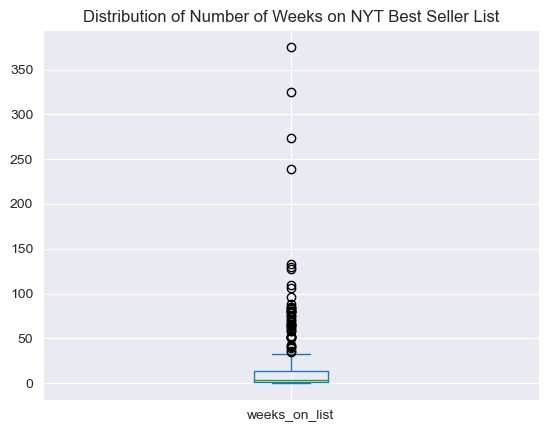

In [139]:
df['weeks_on_list'].plot.box()
plt.title('Distribution of Number of Weeks on NYT Best Seller List')

In [50]:
rank = df.groupby('rank')
first = rank.get_group(1)

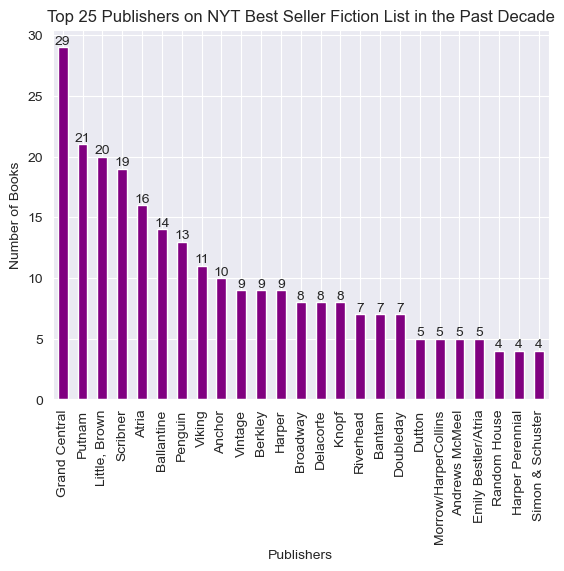

In [136]:
publisher = df.publisher.value_counts()[0:25].plot(kind = "bar", color = "purple");
plt.xlabel("Publishers");
plt.ylabel("Number of Books");
plt.title("Top 25 Publishers on NYT Best Seller Fiction List in the Past Decade");
plt.bar_label(publisher.containers[0], label_type = "edge");

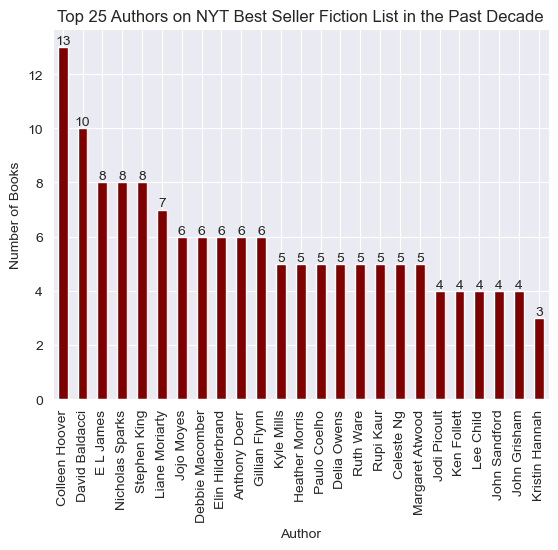

In [137]:
author = df.author.value_counts()[0:25].plot(kind = "bar", color = "maroon");
plt.xlabel("Author")
plt.ylabel("Number of Books")
plt.title("Top 25 Authors on NYT Best Seller Fiction List in the Past Decade")
plt.bar_label(author.containers[0], label_type = "edge");

In [80]:
sort = df.sort_values(by=['weeks_on_list'], ascending=False)
sort

,rank,rank_last_week,weeks_on_list,primary_isbn13,publisher,description,title,author
98,4,0,375,9780062315007,HarperOne/HarperCollins,"In this fable, a Spanish shepherd boy ventures...",THE ALCHEMIST,Paulo Coelho
161,2,0,325,9780061122415,HarperOne/HarperCollins,"In this fable, a Spanish shepherd boy ventures...",THE ALCHEMIST,Paulo Coelho
242,13,0,274,9780061122415,HarperOne,"In this fable, a Spanish shepherd boy ventures...",THE ALCHEMIST,Paulo Coelho
311,12,0,239,9780061122415,HarperOne,"In this fable, a Spanish shepherd boy ventures...",THE ALCHEMIST,Paulo Coelho
115,6,5,133,9780385490818,Anchor,"In the Republic of Gilead's dystopian future, ...",THE HANDMAID'S TALE,Margaret Atwood
...,...,...,...,...,...,...,...,...
142,18,0,0,9780399163845,Marian Wood/Putnam,A variety of X’s lead the private detective Ki...,X,Sue Grafton
143,19,0,0,9781594634475,Riverhead,"The story of a marriage, and of the personal t...",FATES AND FURIES,Lauren Groff
144,20,0,0,9780374239213,"Farrar, Straus & Giroux","A recent college graduate, a German Julian Ass...",PURITY,Jonathan Franzen
214,20,0,0,9780399159343,Amy Einhorn/Putnam,A successful businesswoman and devoted wife an...,THE HUSBAND'S SECRET,Liane Moriarty


In [81]:
nodup = sort.drop_duplicates(subset=['title'])
nodup

,rank,rank_last_week,weeks_on_list,primary_isbn13,publisher,description,title,author
98,4,0,375,9780062315007,HarperOne/HarperCollins,"In this fable, a Spanish shepherd boy ventures...",THE ALCHEMIST,Paulo Coelho
115,6,5,133,9780385490818,Anchor,"In the Republic of Gilead's dystopian future, ...",THE HANDMAID'S TALE,Margaret Atwood
259,10,9,130,9781449474256,Andrews McMeel,"A collection of poetry about love, loss, traum...",MILK AND HONEY,Rupi Kaur
73,14,13,127,9781476746586,Scribner,The lives of a blind French girl and a gadget-...,ALL THE LIGHT WE CANNOT SEE,Anthony Doerr
156,12,11,110,9780735219090,Putnam,In a quiet town on the North Carolina coast in...,WHERE THE CRAWDADS SING,Delia Owens
...,...,...,...,...,...,...,...,...
41,12,0,0,9781455520626,Grand Central,A couple in love are threatened by secrets fro...,SEE ME,Nicholas Sparks
142,18,0,0,9780399163845,Marian Wood/Putnam,A variety of X’s lead the private detective Ki...,X,Sue Grafton
143,19,0,0,9781594634475,Riverhead,"The story of a marriage, and of the personal t...",FATES AND FURIES,Lauren Groff
144,20,0,0,9780374239213,"Farrar, Straus & Giroux","A recent college graduate, a German Julian Ass...",PURITY,Jonathan Franzen


In [88]:
nodup.drop(nodup.index[30:], axis=0, inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [90]:
nodup

,rank,rank_last_week,weeks_on_list,primary_isbn13,publisher,description,title,author
98,4,0,375,9780062315007,HarperOne/HarperCollins,"In this fable, a Spanish shepherd boy ventures...",THE ALCHEMIST,Paulo Coelho
115,6,5,133,9780385490818,Anchor,"In the Republic of Gilead's dystopian future, ...",THE HANDMAID'S TALE,Margaret Atwood
259,10,9,130,9781449474256,Andrews McMeel,"A collection of poetry about love, loss, traum...",MILK AND HONEY,Rupi Kaur
73,14,13,127,9781476746586,Scribner,The lives of a blind French girl and a gadget-...,ALL THE LIGHT WE CANNOT SEE,Anthony Doerr
156,12,11,110,9780735219090,Putnam,In a quiet town on the North Carolina coast in...,WHERE THE CRAWDADS SING,Delia Owens
101,7,0,96,9780061950728,Morrow/HarperCollins,A historical novel about orphans swept off the...,ORPHAN TRAIN,Christina Baker Kline
5,6,7,88,9781501161933,Washington Square/Atria,A movie icon recounts stories of her loves and...,THE SEVEN HUSBANDS OF EVELYN HUGO,Taylor Jenkins Reid
232,3,0,83,9780345803481,Vintage,An inexperienced college student falls in love...,FIFTY SHADES OF GREY,E L James
72,13,12,81,9780312577223,St. Martin’s,Two sisters in World War II France: one strugg...,THE NIGHTINGALE,Kristin Hannah
1,2,2,80,9781501110368,Atria,A battered wife raised in a violent home attem...,IT ENDS WITH US,Colleen Hoover


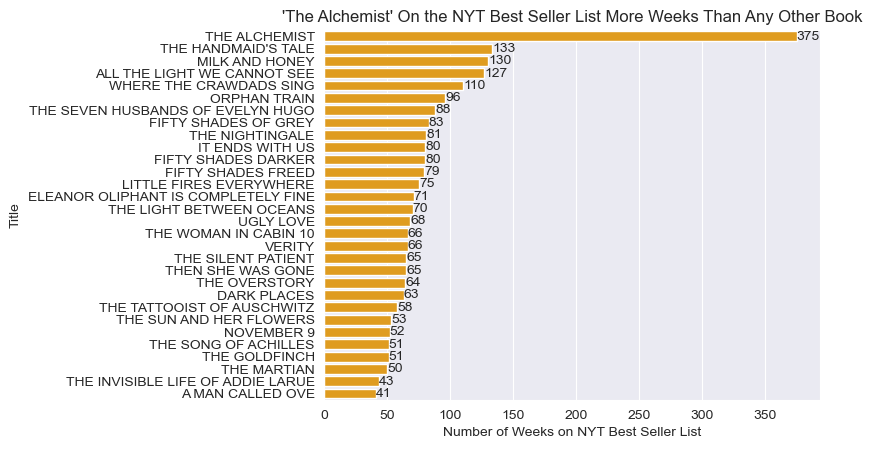

In [135]:
titles = sns.barplot(data=nodup, x="weeks_on_list", y="title", color = "orange");
plt.xlabel("Number of Weeks on NYT Best Seller List")
plt.ylabel("Title")
plt.title("'The Alchemist' On the NYT Best Seller List More Weeks Than Any Other Book")
plt.bar_label(titles.containers[0], label_type = "edge");

Text(0.5, 1.0, 'Distribution of the Difference Between Current and Previous Rank on NYT Best Seller List')

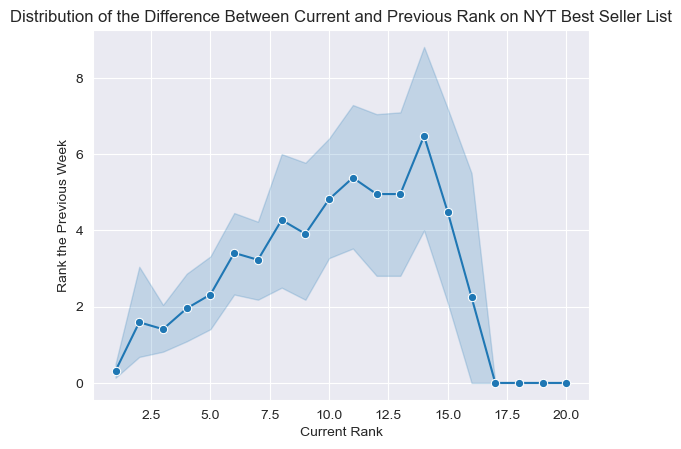

In [140]:
sns.lineplot(data=df, x="rank", y="rank_last_week", marker="o")
plt.xlabel("Current Rank")
plt.ylabel("Rank the Previous Week")
plt.title("Distribution of the Difference Between Current and Previous Rank on NYT Best Seller List")

In [149]:
publisher = df.groupby('publisher')
grand = publisher.get_group('Grand Central')

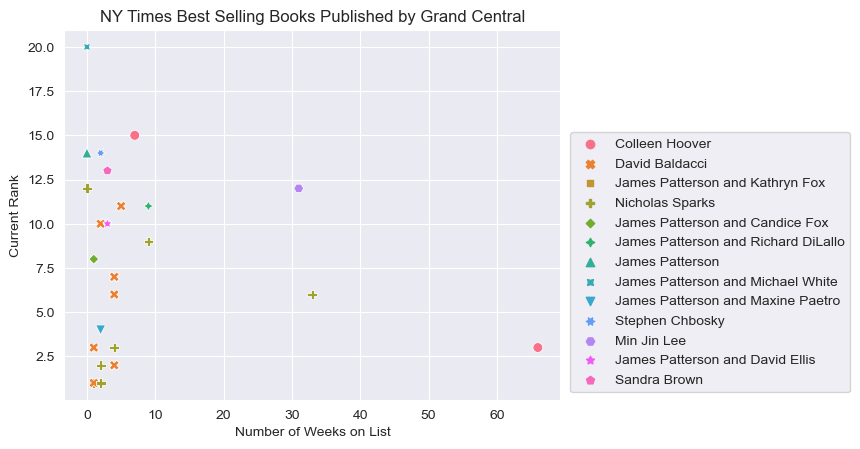

In [156]:
sns.scatterplot(data = grand, x = "weeks_on_list", y = "rank", hue = "author", style="author", s=50)
plt.title("NY Times Best Selling Books Published by Grand Central")
plt.xlabel("Number of Weeks on List")
plt.ylabel("Current Rank")
plt.legend(bbox_to_anchor=(1.02, 0.02), loc='lower left', borderaxespad=0)

In [155]:
author = df.groupby('author')
colleen = author.get_group('Colleen Hoover')

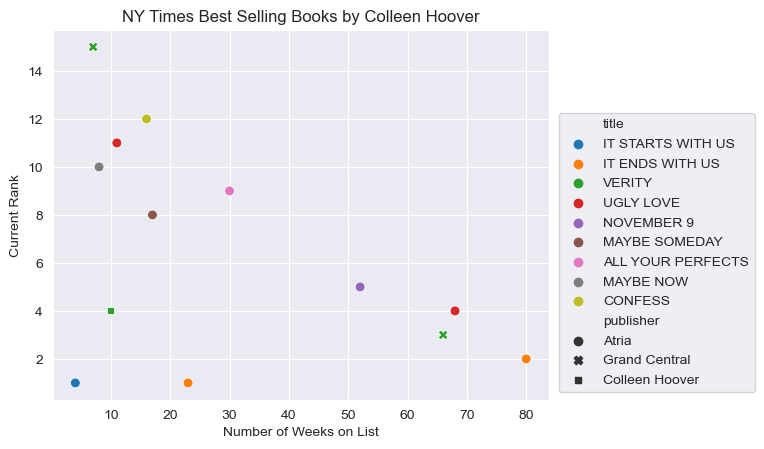

In [159]:
sns.scatterplot(data = colleen, x = "weeks_on_list", y = "rank", hue = "title", style="publisher", s=50)
plt.title("NY Times Best Selling Books by Colleen Hoover")
plt.xlabel("Number of Weeks on List")
plt.ylabel("Current Rank")
plt.legend(bbox_to_anchor=(1.02, 0.02), loc='lower left', borderaxespad=0)